FIT5196 Assessment 1 task2

Student Name: Jiaming Ren

Student ID: 217218863

Date: 9/3/2021

Version: 2.0

Environment: Python 3.8.5 and Anaconda 4.10.3 (64-bit)

Libraries used:

- re (for regular expression, included in Anaconda Python 3.8)
- os (for file operation, included in Anaconda Python 3.8)
- nltk (Natural Language Toolkit, included in Anaconda Python 3.8)
- nltk.collocations (for finding bigrams, included in Anaconda Python 3.8)
- nltk.tokenize (for tokenization, included in Anaconda Python 3.8)
- nltk.corpus (for stop words, not included in Anaconda)
- sklearn (for machine learning, included in Anaconda)

# Task 2 Instruction:
This task touches on the next step of analyzing textual data, i.e., converting the extracted data
into a numeric representation. In this task, you are required to write Python code to preprocess a
set of articles about cryptocurrency and convert them into numerical representations

Steps: 
1. Import libraries
2. Examining and loading data
3. Extract text from file
4. Tokenization
5. Removing Stop words
6. stemming and Lemmatization

     6.1 output word count file
     
7. create sparse matrix

    7.1 output count vector
    
8. Summary
9. References

# 1. Import libraries
libraries used in this assessment

In [1]:
#import libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from pdfminer.high_level import extract_text
from nltk import PorterStemmer, ngrams
from nltk.probability import *
from sklearn.feature_extraction.text import CountVectorizer

# 2. Examining and loading data
as the first step, the pdf file will be loaded

In [2]:
#load and extract text from pdf 
pdfFile = r'12899380_task2_pdf.pdf'
text = extract_text(pdfFile)
#help extract last article
text = text+'[end]'
len(text)

596689

# 3. Extract text from file
Group all articles that are published in same day

date example: [2018-07-10], [2018-07-10

steps: 
1. define regex and find all dates in the text

2. define regex and find all articles in the text

notes:
- the length of dates and articles should be the same

- some dates are unclosed, but can be fixed

In [3]:
#define date regex
regex_unclosed_date = r'\[\d{4}-\d{2}-\d{2}\]?'
regex_closed_date = r'\[\d{4}-\d{2}-\d{2}\]'

#find all date with unclosed_date
unclosed_date = re.findall(regex_unclosed_date, text)

#find all date without unclosed_date
closed_date = re.findall(regex_closed_date, text)

#find all unclosed_date
unclosed_date = list(set(unclosed_date)-set(closed_date))
print('unclosed date tage: ', unclosed_date)

#make all unclosed_date to closed_date
for i in unclosed_date:
    text = text.replace(i, i + '] ')
    
#filtered dates  
dates = re.findall(regex_closed_date, text)
#print length and head
print('date: ',len(dates), ' ', dates[:5])

#define content regex
#from observation we found that each article is between two dates tag.
#Thus, i will extract all text between two date tags.
#for the last article, we manualy add a [end] tage at the end to replace 
regex_content = r'(?<=\[\d{4}-\d{2}-\d{2}\])(.*?)(?=\[\w{4}-\w{2}-\w{2}\]|\[end\])'

#find all contents
contents = re.findall(regex_content, text,re.DOTALL)

#print length and head
print('contents: ',len(contents))

unclosed date tage:  ['[2016-10-11']
date:  473   ['[2018-07-10]', '[2016-08-03]', '[2016-05-18]', '[2016-03-12]', '[2021-07-06]']
contents:  473


If the title have a second line, it is hard for me to use re to remove it.

From observation, I found that by spliting newline.The title will in the first cell. If the title have a second line, the second cell for each list will not be empty: 
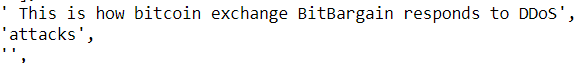

if the title do not have a second line, the second cell would be empty:
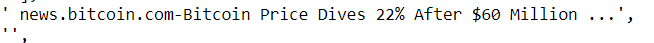

Thus,loop over the contents list and all titles and for list that title have a second line, I connect first and second cell. Save all list in a new list, then use replace function remove all titles from each article.

In [4]:
#split each list in content by \n
l_text = [i.split('\n') for i in contents]

#list that save titles
titles =[]

#extract titles
for i in range(len(l_text)):
    #append title with second line
    if l_text[i][1] != '':
        #connect first and second cell
        titles.append(l_text[i][0] +'\n' + l_text[i][1])
    else:
        #append title that have one line
        titles.append(l_text[i][0])

group extracted data by date

In [5]:
date_dict = {}

contents
for i in range(len(dates)):
    contents[i] = contents[i].replace(titles[i],'')
    #if the date exist, add new value
    if dates[i] in date_dict:
        date_dict[dates[i]].append(contents[i])
    else:
        date_dict[dates[i]] = [contents[i]]
date_dict['[2021-03-08]']

["\n\nNorway-Listed Aker to Put 100% Bitcoin in Treasury Reserves of New Investment UnitFrom\nCoindesk.QuoteOwned by billionaire Kjell Inge Roekke, the firm's new investment entity, Seetee, is\ngoing all in on bitcoin.Yet another big player enters the Bitcoin space. Interesting to see a european\nhigh profilecompany make the move.I wonder if they have been infleuenced by Michael Saylor.\n\n"]

# 4. Tokenization
Tokenization by each date

In [6]:
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?", gaps=False) 

#dict that store token
token_dict = {}
#loop over dict
for date in date_dict.keys():
    #get articles
    article = date_dict[date]
    #temporary list that store token
    temp_token = []
    #loop each articles
    for i in article:
        #Tokenization
        tokens=tokenizer.tokenize(i)
        #Case Normalization
        temp_token += [token.lower() for token in tokens]
        
    token_dict[date] = temp_token
token_dict

{'[2018-07-10]': ['cryptor',
  'trust',
  'is',
  'offering',
  'a',
  'new',
  'investment',
  'vehicle',
  'focused',
  'on',
  'blockchain',
  'venture',
  'named',
  'blockchain',
  'investment',
  'inc',
  'short',
  'called',
  'bi',
  'the',
  'company',
  'is',
  'now',
  'open',
  'for',
  'investors',
  'worldwide',
  'opportunity',
  'to',
  'invest',
  'in',
  'the',
  'drivers',
  'of',
  'the',
  'th',
  'industrial',
  'revolution',
  'full',
  'article',
  'on',
  'https',
  'cryptortrust',
  'com',
  'news',
  'cryptor-trust',
  'launch-blockchain',
  'investment-vehicle'],
 '[2016-08-03]': ['bitcoin',
  'price',
  'dives',
  'after',
  'million',
  'bitfinex',
  'hackon',
  'august',
  'nd',
  'during',
  'the',
  'course',
  'of',
  'the',
  'day',
  'the',
  'price',
  'of',
  'bitcoin',
  'steadily',
  'dropped',
  'until',
  'mid-afternoon',
  'eastern',
  'standard',
  'time',
  'when',
  'the',
  'currency',
  's',
  'value',
  'suddenly',
  'plummeted',
  'this

# 5. Removing Stop words

In [7]:
#open stopwords file
with open('stopwords_en.txt','r') as f:
    stopwords_set = set(map(lambda x:x.strip(),f.readlines()))

#a list store token
list_token = []
#loop keys
for key in token_dict:
    #get token for each key
    l_token = token_dict[key]
    #temporary store token
    set_token = set()
    #loop each token
    for token in l_token:
        #i
        if(token not in stopwords_set) and (len(token) > 2):
            set_token.add(token.lower())
    list_token += list(set_token)
    
print(len(list_token))

33327


# 6. stemming and Lemmatization

In [8]:
#list that store filtered worlds
sterm_token=[]
#number of days
n_days = len(dates) /2
#Count how many days each word was used and within how many days it was used
token_frequency = FreqDist(list_token)
#loop keys
for f in token_frequency.keys():
    #store token frequency
    frq_token = token_frequency[f]
    #filter tokens 
    if frq_token >= 10 and frq_token <= n_days: 
        f = PorterStemmer().stem(f)
        if len(f)>2:
            sterm_token.append(f)
        
sterm_token = list(set(sterm_token))

In [9]:
#list that store all tokens
all_token = []
#filtered out stop words
token_no_stop_words = []

#appending
for date in token_dict:
    all_token += token_dict[date]

for s_token in all_token:
    s_token = s_token.lower()
    if s_token not in stopwords_set:
        token_no_stop_words.append(s_token)

#bigram
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(token_no_stop_words,window_size = 2)
#collect 200 meaninggul pairs
bigram = finder.nbest(bigram_measures.pmi, 200)
pmi_200=[]
#join pairs
for i_pair in bigram:
    pmi_200.append('_'.join(i_pair))
len(pmi_200)

200

#### 6.1 output word count file

In [10]:
#output word count file

#group all words
all = sterm_token + pmi_200

#sort
sorted_all = sorted(all)

#string that store all lines
str_all = ''
#write all words
for i in range(len(sorted_all)):
    str_all += sorted_all[i] + ': ' + str(i) + '\n'
#output result in a txt file
with open('217218863_vocab.txt','w') as f:
    f.write(str_all)
    f.close()


# 7. create sparse matrix


In [11]:
#dict that store word and its index
dict_all = {}
for i in range(len(sorted_all)):
    dict_all[sorted_all[i]] = i

#initialize the vector
regex = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
vector = CountVectorizer(token_pattern=regex,stop_words=list(stopwords_set)\
                         ,lowercase=True, ngram_range=(1,2))

#str that store text for writing into file
output_str=''

#loop each date
for date in date_dict.keys():
    date_article = ' '.join(date_dict[date])
    if date_article == None or len(date_article.strip())==0:
        continue
    #build matrix
    matrix = vector.fit_transform([date_article])
#     print(matrix)
    #get feature name and array
    feature_toarray=matrix.toarray()[0]
#     print(feature_toarray)
    feature_name=vector.get_feature_names()
#     print(feature_name)
    #zip the name and array
    word_count = dict(zip(feature_name,feature_toarray))
#     print(word_count)
    all_vector = {}
    #loop over word count
    for word,count in word_count.items():
        if count > 0:
            #some may have two word. i will split them and
            # rejoin the with _
            split = word.split()
            if len(split) == 2:
                n_word = '_'.join(split)
            else:
                n_word = PorterStemmer().stem(word)
            if n_word in dict_all.keys():
                i = dict_all[n_word]
                if i in all_vector.keys():
                    #if in the dict, add up
                    all_vector[i] = all_vector[i] + word_count[word]
                else:
                    #if not in the dict, add new value
                    all_vector[i] = word_count[word]
    sorted_dict = dict(sorted(all_vector.items(),key=lambda x: x[1],reverse =True))
    #summarise data and prepare for writing output
    l = [str(str(x)+':'+str(y)) for x,y in sorted_dict.items()]
    date = date[1:-1]
    output_str = output_str + str(date)+','+','.join(l)+'\n'

#### 7.1 output count vector

In [12]:
with open('217218863_countVec.txt','w') as f:
    f.write(output_str)
    f.close()

# 8. Summary
This assessment measured the understanding of basic text file processing techniques in the Python programming language, The main outcomes achieved while applying these techniques were:

- Exporting data to specific format.

- Tokenization, collocation extraction

- Vocabulary and sparse vector generation

# 9. References
- NLTK Project. (2017). *NLTK 3.0 documentation: `nltk.tokenize.regexp` module*. Retrieved from http://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.regexp.RegexpTokenizer